# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Varel Antoni
- **Email:** varelantonni@gmail.com
- **ID Dicoding:** MC006D5Y1761

## Menentukan Pertanyaan Bisnis

- pada bulan apa peminjaman sepeda banyak dilakukan?
- Melihat performa peminjaman sepeda berdasarkan cuaca (weathersit)

## Import Semua Packages/Library yang Digunakan

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [312]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
melakukan drive.mount() untuk mendapatkan akses ke Google Drive

In [313]:
file_path_day = "/content/drive/MyDrive/Google_Colab_Dicoding/Bike-sharing-dataset/day.csv"
day_df = pd.read_csv(file_path_day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [314]:
file_path_hour = "/content/drive/MyDrive/Google_Colab_Dicoding/Bike-sharing-dataset/hour.csv"
hour_df = pd.read_csv(file_path_hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- mengakses file path dataset hour dari google drive
- mengakses file path dataset day dari google drive

### Assessing Data

In [315]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- dari dataset terlihat beberapa info bahwa tidak missing value namun kolom dtedey masih bertipe object


In [316]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- tidak terdapat missing value di dataset day

In [317]:
day_df.duplicated().sum()

0

**Insight:**
- tidak terdapat data duplicate pada dataset day_df


In [318]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- dapat dilihat setelah melakukan describe, dataset masih memperlihatkan sifat normal

In [319]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- sama seperti dataset day, permasalahan hanya ada di kolom dteday yang masih bertipe object

In [320]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- tidak terdapat missing value di dataset hour

In [321]:
hour_df.duplicated().sum()

0

**Insight:**
- tidak terdapat duplicate values pada dataset hour_df

In [322]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- tidak terdapat kesalahan di dataset hour setelah melakukan describe()

dari proses data assesing diatas, kedua dataset terbilang memiliki kualitas yang sangat bagus. karena kedua dataset tidak memiliki duplicate value, missing value, dan juga outlier yang akan merusak kualitas data. hanya satu masalah yaitu kolom dteday memiliki tipe object yang seharusnya datetime

### Cleaning Data

In [323]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

**Insight:**
- merubah tipe dteday pada dataset day ke datetime
- merubah tipe dteday pada dataset hour ke datetime

In [324]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- kembali mengecek dataset day setelah melakukan cleaning. dari proses melakukan info(), tipe dteday sudah berubah menjadi datetime

In [325]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [326]:
Q1 = (day_df['cnt']).quantile(0.25)
Q3 = (day_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['cnt'] < minimum
kondisi_more_than = day_df['cnt'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

In [327]:
Q1 = (hour_df['cnt']).quantile(0.25)
Q3 = (hour_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

hour_df.drop(day_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(day_df[kondisi_more_than].index, inplace=True)

<ipython-input-327-077d6421199b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_df.drop(day_df[kondisi_lower_than].index, inplace=True)
<ipython-input-327-077d6421199b>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_df.drop(day_df[kondisi_more_than].index, inplace=True)


**Insight:**
- dari 2 cell tersebut kita mengatasi outlier dengan drop, namun karena tidak ada values yang terhapus kita asumsikan bahwa tidak ada outlier

In [328]:
day_df.rename(columns={'instant': 'instant', 'season' : 'season', 'yr' : 'year', 'mnth' : 'month', 'holiday' : 'holiday', 'weekday' : 'weekday', 'workingday' : 'workingday'
, 'weathersit' : 'weather', 'temp' : 'temp', 'atemp' : 'atemp', 'hum' : 'hum', 'windspeed' : 'windspeed', 'casual' : 'casual', 'registered' : 'registered', 'cnt' : 'cnt'}, inplace=True)

**Insight:**
- Melakukan rename terhadap kolom di dataset day_df

In [329]:
hour_df.rename(columns={'instant': 'instant', 'season' : 'season', 'yr' : 'year', 'mnth' : 'month', 'holiday' : 'holiday', 'weekday' : 'weekday', 'workingday' : 'workingday'
, 'weathersit' : 'weather', 'temp' : 'temp', 'atemp' : 'atemp', 'hum' : 'hum', 'windspeed' : 'windspeed', 'casual' : 'casual', 'registered' : 'registered', 'cnt' : 'cnt'}, inplace=True)

**Insight:**
- Melakukan rename terhadap kolom di dataset hour_df

In [330]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,temp_x,...,weekday_y,workingday_y,weather_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- menggabungkan kedua dataset untuk memperoleh lebih banyak informasi dengan key values dteday

In [331]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   year_x        17379 non-null  int64         
 4   month_x       17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weather_x     17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

**Insight:**
- dari dataset yang telah digabungkan terdapat kolom yang dinamai "_x" yang bearti dari dataset day_df dan juga kolom yang dinamai "_y" yang bearti dataset hour_df

In [332]:
all_df.rename(columns={'instant_x': 'instant_day', 'season_x' : 'season_day', 'year_x' : 'year_day', 'month_x' : 'month_day', 'holiday_x' : 'holiday_day', 'weekday_x' : 'weekday_day', 'workingday_x' : 'workingday_day'
, 'weather_x' : 'weather_day', 'temp_x' : 'temp_day', 'atemp_x' : 'atemp_day', 'hum_x' : 'hum_day', 'windspeed_x' : 'windspeed_day', 'casual_x' : 'casual_day', 'registered_x' : 'registered_day', 'cnt_x' : 'cnt_day'}, inplace=True)

**Insight:**
- merubah nama kolom yang memiliki _x menjadi kolom per day

In [333]:
all_df.rename(columns={'instant_y': 'instant_hour', 'season_y' : 'season_hour', 'year_y' : 'year_hour', 'month_y' : 'month_hour', 'hr' : 'hour', 'holiday_y' : 'holiday_hour', 'weekday_y' : 'weekday_hour', 'workingday_y' : 'workingday_hour'
, 'weather_y' : 'weather_hour', 'temp_y' : 'temp_hour', 'atemp_y' : 'atemp_hour', 'hum_y' : 'hum_hour', 'windspeed_y' : 'windspeed_hour', 'casual_y' : 'casual_hour', 'registered_y' : 'registered_hour', 'cnt_y' : 'cnt_hour'}, inplace=True)

**Insight:**
- merubah nama kolom yang memiliki _y menjadi kolom per hour

In [334]:
mapping_dict_day = {
    'season_day': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'year_day': {0: '2011', 1: '2012'},
    'month_day': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                  6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
                  11: 'November', 12: 'December'},
    'holiday_day': {0: 'Not Holiday', 1: 'Holiday'},
    'weekday_day': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                    4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday_day': {0: 'Not Working Day', 1: 'Working Day'},
    'weather_day': {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
}

mapping_dict_hour = {
    'season_hour': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'year_hour': {0: '2011', 1: '2012'},
    'month_hour': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                  6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
                  11: 'November', 12: 'December'},
    'holiday_hour': {0: 'Not Holiday', 1: 'Holiday'},
    'weekday_hour': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                    4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday_hour': {0: 'Not Working Day', 1: 'Working Day'},
    'weather_hour': {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
}

**Insight:**
- Melakukan mapping values dari kolom kategorial menjadi nama sebenarnya pada dataset all_df

In [335]:
for col, mapping in mapping_dict_day.items():
    if col in all_df.columns:
        all_df[col] = all_df[col].map(mapping)

for col, mapping in mapping_dict_hour.items():
    if col in all_df.columns:
        all_df[col] = all_df[col].map(mapping)

**Insight:**
- melakukan loop untuk mengubah nilai pada semua kolom yang ada di mapping_dict

In [336]:
all_df.head()

,instant_day,dteday,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day,temp_day,...,weekday_hour,workingday_hour,weather_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist/Cloudy,0.344167,...,Saturday,Not Working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist/Cloudy,0.344167,...,Saturday,Not Working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist/Cloudy,0.344167,...,Saturday,Not Working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist/Cloudy,0.344167,...,Saturday,Not Working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist/Cloudy,0.344167,...,Saturday,Not Working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [337]:
mapping_dict = {
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'year': {0: '2011', 1: '2012'},
    'month': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                  6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
                  11: 'November', 12: 'December'},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                    4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday': {0: 'Not Working Day', 1: 'Working Day'},
    'weather': {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
}

**Insight:**
- Melakukan mapping values dari kolom kategorial menjadi nama sebenarnya untuk dataset day_df dan hour_df

In [338]:
for col, mapping in mapping_dict.items():
    if col in day_df.columns:
        day_df[col] = day_df[col].map(mapping)

for col, mapping in mapping_dict.items():
    if col in hour_df.columns:
        hour_df[col] = hour_df[col].map(mapping)

**Insight:**
- melakukan loop untuk mengubah nilai pada semua kolom yang ada di mapping_dict untuk keperluan visualisasi

In [339]:
day_df.to_csv("day_df.csv", index=False)

merubah day_df ke format csv sehingga bisa di download

In [340]:
hour_df.to_csv("hour_df.csv", index=False)

merubah hour_df ke format csv sehingga bisa di download

**Insight:**
- sama seperti dataset day, melakukan pengecekan kembali kepada dataset hour setelah melakukan cleaning. dari proses melakukan info(), tipe dteday sudah berubah menjadi datetime
- mengatasi outlier dengan menghapus baris yang terindikasi outlier, namun tidak ada baris yang terhapus
- melakukan merged pada kedua dataset untuk mempermudah EDA kedepannya
- ketika sudah di merged, merubah nama kolom dan nama values agar lebih mudah dipahami

## Exploratory Data Analysis (EDA)

### Explore ...

In [341]:
all_df["all_weather"] = all_df["weather_day"].combine_first(all_df["weather_hour"])
all_df["all_cnt"] = all_df["cnt_day"].combine_first(all_df["cnt_hour"])
all_df["all_instant"] = all_df["instant_day"].combine_first(all_df["instant_hour"])

all_df.groupby(by='all_weather').agg({
    'all_instant': ['nunique'],
    'all_cnt': ['mean', 'min', 'max']
})

all_instant      all_cnt           
                    nunique         mean  min   max
all_weather                                        
Clear                   463  4895.177083  431  8714
Light Snow/Rain          21  1914.700855   22  4639
Mist/Cloudy             247  4062.717595  605  8362

**Insight:**
- menggabungkan kolom untuk mendapatkan kolom total weather, cnt, dan instant. lalu membuat pivot table untuk melihat nilai mean, min, dan max.

In [342]:
all_df["all_month"] = all_df["month_day"].combine_first(all_df["month_hour"])

all_df.groupby(by='all_month').agg({
    'all_instant': ['nunique'],
    'all_cnt': ['mean', 'min', 'max']
})

all_instant      all_cnt            
              nunique         mean   min   max
all_month                                     
April              60  4484.418928   795  7460
August             62  5689.239322  1115  7865
December           62  3411.030344   441  6606
February           57  2671.260999  1005  5062
January            62  2228.370189   431  4521
July               62  5563.677419  3285  8173
June               60  5772.366667  3767  8120
March              62  3709.164969   605  8362
May                62  5349.774194  2633  8294
November           60  4245.956159  1495  6852
October            62  5319.965541    22  8156
September          60  5772.107864  1842  8714

**Insight:**
- menggabungkan kolom untuk mendapatkan kolom total month. lalu membuat pivot table untuk melihat nilai mean, min, dan max.

In [343]:
all_df.groupby(by="all_weather").all_instant.nunique().sort_values(ascending=False)

,all_instant
all_weather,
Clear,463
Mist/Cloudy,247
Light Snow/Rain,21


**Insight:**
- dapat dilihat bahwa peminjaman sepeda didominasi saat cuaca sedang baik/Clear

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa peminjaman sepeda lebih banyak dilakukan

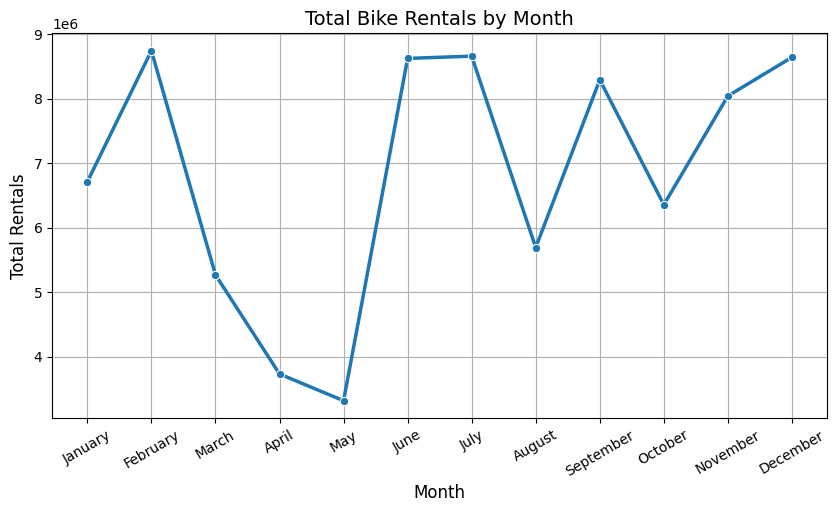

In [344]:
month_order = {'January' : 0, 'February' : 1, 'March' : 2, 'April' : 3, 'May' : 4, 'June' : 5,
               'July' : 6, 'August' : 7, 'September' : 8, 'October' : 9, 'November' : 10, 'December' : 11}

monthly_day_rentals = all_df.groupby('month_day')['cnt_day'].sum()
monthly_hour_rentals = all_df.groupby('month_hour')['cnt_hour'].sum()

total_monthly_rentals = monthly_day_rentals.add(monthly_hour_rentals, fill_value=0)

total_monthly_rentals = total_monthly_rentals.dropna().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=total_monthly_rentals.index, y=total_monthly_rentals.values, marker='o', linewidth=2.5)

plt.xticks(ticks=range(0, 12), labels=month_order, rotation=30)

plt.title('Total Bike Rentals by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(True)

plt.show()

**Insight:**
- dari grafik yang terlihat jelas bahwa peminjaman sepeda paling banyak dilakukan pada bulan februari dan paling sedikit pada bulan mei

### Pertanyaan 2:

<ipython-input-345-0e6aaa886a83>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weather Condition")


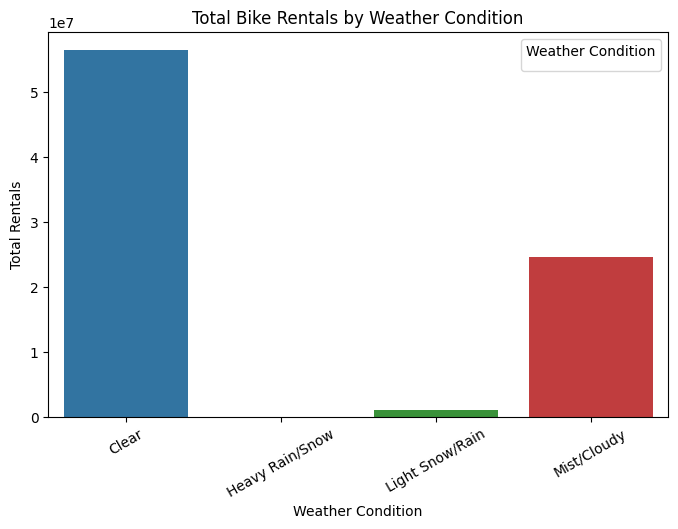

In [345]:
weather_mapping = {'Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'}

weather_day_rentals = all_df.groupby('weather_day')['cnt_day'].sum()
weather_hour_rentals = all_df.groupby('weather_hour')['cnt_hour'].sum()

total_weather_rentals = weather_day_rentals.add(weather_hour_rentals, fill_value=0)

weather_df = total_weather_rentals.reset_index()
weather_df.columns = ['Weather Condition', 'Total Rentals']

plt.figure(figsize=(8, 5))
sns.barplot(data=weather_df, x='Weather Condition', y='Total Rentals', hue='Weather Condition', dodge=False)

plt.title('Total Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.xticks(rotation=30)
plt.legend(title="Weather Condition")
plt.show()

**Insight:**
- dari visualisasi, terdapat insight bahwa peminjaman sepeda didominasi ketika cuaca sedang clear, lalu ketika Mis/Cloudy juga terdapat beberapa yang masih meminjam sepeda dan ketika Light Snow dan Heavy Rain yang meminjam sepeda cenderung sangat sedikit

In [346]:
all_df.to_csv("all_data.csv", index=False)

merubah all_df ke format csv sehingga bisa di download

---



## Analisis Lanjutan (Opsional)

## Conclusion

- Dari pertanyaan pertama dapat disimpulkan bahwa mayoritas user meminjam sepeda pada bulan Februari, juli dan november, hanya sedikit yang meminjam pada bulan april dan mei, jadi penyewaan sepeda bisa menyediakan stok lebih banyak pada bulan april dan memaksimalkannya pada bulan tersebut
- dari pertanyaan kedua dapat dilihat bahwa user lebih sering meminjam sepeda ketika cuaca sedang baik dan bersih, penyediaan sepeda pada cuaca buruk mungkin dapat dikurangin untuk meminimalisir kerusakan pada sepeda peminjaman karena cuaca buruk memiliki potensi kecil sebagai pemicu bencana alam